# Import

In [1]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Exponential out of Uniform

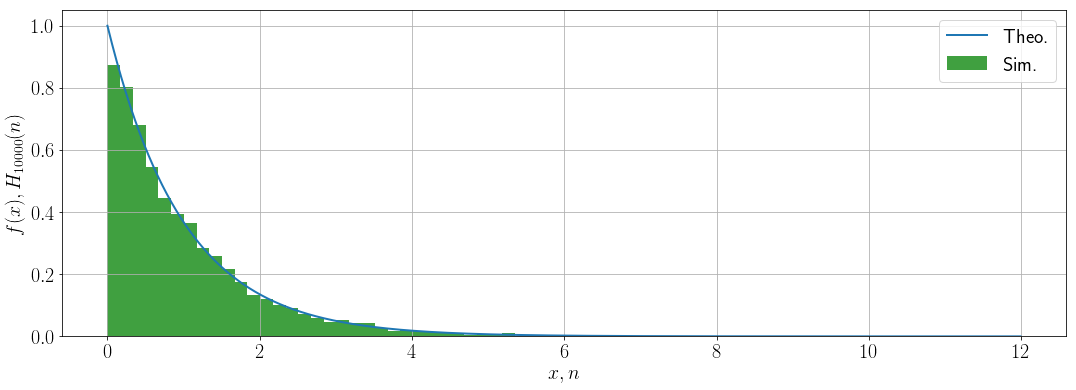

In [2]:
# theoretical values
lamb = 1

delta_t = .01
t = np.arange( 0, 12, delta_t )
f_exp_theo = lamb * np.exp( - lamb * t )


# simulation
N_trials = int( 1e4 )

# get uniformly distributed values and map according to theorem
Z = np.random.rand( N_trials )

Y = -1/lamb * np.log( 1 - Z )

# plotting
plt.plot( t, f_exp_theo, linewidth=2.0, label='Theo.')    
plt.hist( Y, 50, color='g', normed=1, label='Sim.', alpha=0.75)    

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format(N_trials)) 
plt.grid( True )
plt.legend( loc = 'upper right' )

# Gaussian out of Uniform

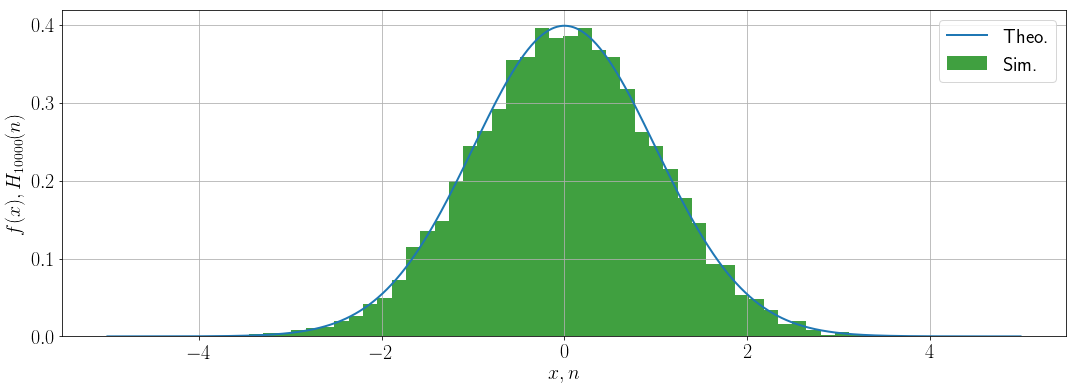

In [3]:
# theoretical values
delta_t = .01
t = np.arange( -5, 5, delta_t )
f_exp_theo = 1/np.sqrt(2*np.pi) * np.exp( - t**2 /2  )


# simulation
N_trials = int( 1e4 )

# get uniformly distributed values and map according to theorem
# NOTE: ppf realizing inverse of cdf of gaussian
Z = np.random.rand( N_trials )

Y = stats.norm.ppf( Z )

# plotting
plt.plot( t, f_exp_theo, linewidth=2.0, label='Theo.')    
plt.hist( Y, 50, color='g', normed=1, label='Sim.', alpha=0.75)    

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format(N_trials)) 
plt.grid( True )
plt.legend( loc = 'upper right' )

# Generating Uniform Distribution by Congruence

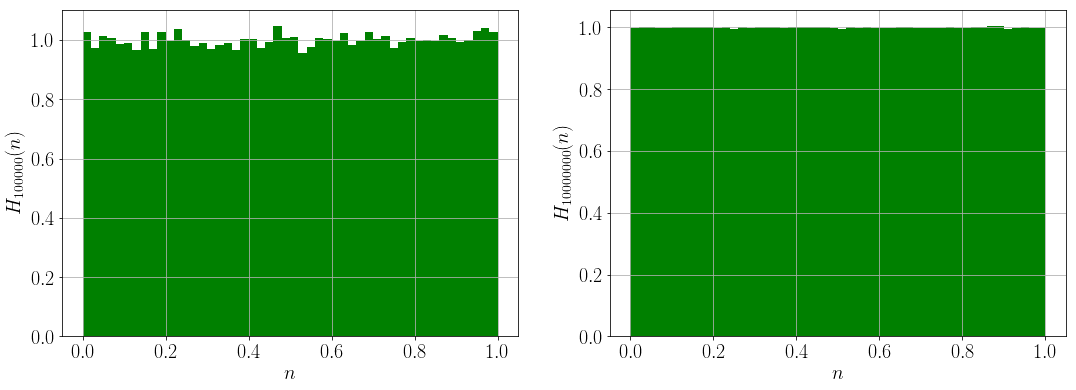

In [4]:
# parameters out of the book chapter
a = 7**5
c = 0
m = 2**31 - 1

# number of points to be sampled    
N_points = int( 1e7 )
N_points_small = int( 1e5 )

# initialize array for pseudo-random numbers
points = np.zeros( N_points )    
points[ 0 ] = np.random.randint( m )

# loop for generating numbers by congruence
for n in np.arange( 1, N_points ):

    new_value = (points[ n - 1 ] * a + c ) % m 
    points[ n ] = new_value 

# normalize to [0,1]
points /= m


# plotting    
plt.subplot(121)    
plt.hist( points[ : N_points_small ], color='g', bins=50, normed=1, label='sim.' ) 

plt.grid( True )
plt.xlabel('$n$')
plt.ylabel('$H_{{{}}}(n)$'.format( N_points_small ) )


plt.subplot(122)    
plt.hist( points, color='g', bins=50, normed=1, label='sim.' ) 

plt.grid( True )
plt.xlabel('$n$')
plt.ylabel('$H_{{{}}}(n)$'.format( N_points ) )

# Central $\chi^2$ and Rayleigh Distribution

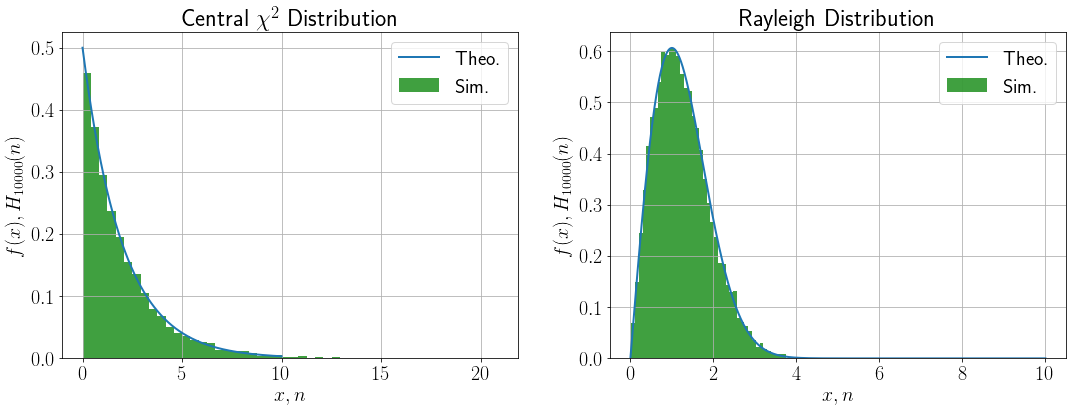

In [5]:
# parameters of distribution 
sigma2 = 1  


# continuous world and theoretical pdf
delta_x = .001

x = np.arange( 0, 10 * np.sqrt(sigma2) + delta_x, delta_x)    
f_theo_chi2 = 1 / sigma2 / 2 * np.exp( - x / 2 / sigma2 ) 
f_theo_Ray = x / sigma2 * np.exp( - x**2 / 2 / sigma2 )


# sample gaussian
N_samples = int( 1e4 )
X = np.sqrt( sigma2 ) * np.random.randn( 2, N_samples )

X2 = np.sum( X**2, axis = 0 )
X_R = np.sqrt( X2 )


# plotting
plt.subplot(121)
plt.plot( x, f_theo_chi2, linewidth=2.0, label='Theo.')
plt.hist( X2, 50, color='g', normed=1, label='Sim.', alpha=0.75)  

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format( N_samples ) )

plt.grid( True )
plt.legend( loc = 'upper right' )
plt.title('Central $\chi^2$ Distribution')

plt.subplot(122)
plt.plot( x, f_theo_Ray, linewidth=2.0, label='Theo.')
plt.hist( X_R, 50, color='g', normed=1, label='Sim.', alpha=0.75)    

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format( N_samples ) )

plt.grid( True )
plt.legend( loc = 'upper right' )
plt.title('Rayleigh Distribution' )

# Non-central $\chi^2$ and Rice Distribution 

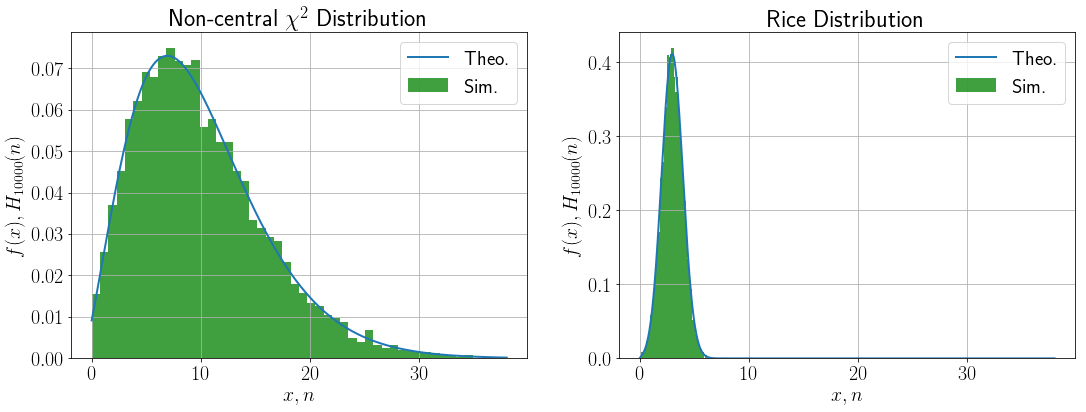

In [6]:
# parameters of distribution 
sigma2 = 1  
mu = 2
s2 = 2 * mu**2


# continuous world and theory
delta_x = .001
x = np.arange( 0, mu**2 * 2 + 30 * np.sqrt(sigma2) + delta_x, delta_x)    
f_theo_chi2 = 1 / sigma2 / 2 * np.exp( - ( s2 + x ) / 2 / sigma2 ) * special.iv( 0, np.sqrt( x * s2 / sigma2 ) )
f_theo_Rice = x / sigma2 * np.exp( - ( x**2  + s2 )/ 2 / sigma2 ) * special.iv( 0, x * np.sqrt( s2 ) / sigma2 ) 


# sample gaussian
N_samples = int( 1e4 )
X = mu + np.sqrt( sigma2 ) * np.random.randn( 2, N_samples )

X2 = np.sum( X**2, axis = 0 )
X_R = np.sqrt( X2 )


# plotting
plt.subplot(121)
plt.plot( x, f_theo_chi2, linewidth=2.0, label='Theo.')
plt.hist( X2, 50, color='g', normed=1, label='Sim.', alpha=0.75)  

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format( N_samples ) )

plt.grid( True )
plt.legend( loc = 'upper right' )
plt.title('Non-central $\chi^2$ Distribution')

plt.subplot(122)
plt.plot( x, f_theo_Rice, linewidth=2.0, label='Theo.')
plt.hist( X_R, 50, color='g', normed=1, label='Sim.', alpha=0.75)    

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format( N_samples ) )

plt.grid( True )
plt.legend( loc = 'upper right' )
plt.title('Rice Distribution' )